11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


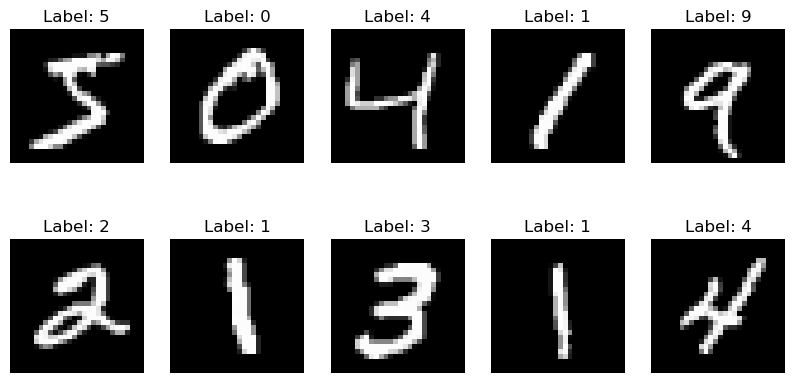

C:\Users\Work\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1]:
!pip install numpy pandas matplotlib tensorflow keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data
x_train = np.expand_dims(x_train, -1)  # Add channel dimension
x_test = np.expand_dims(x_test, -1)
# Plot some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()
# Build the model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
def predict_digit(image):
    image = image.reshape(1, 28, 28, 1)  # Reshape for the model
    prediction = model.predict(image)
    return np.argmax(prediction)

# Example prediction
predicted_label = predict_digit(x_test[0])
print(f'Predicted label: {predicted_label}, Actual label: {y_test[0]}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.8872 - loss: 0.3686 - val_accuracy: 0.9826 - val_loss: 0.0628
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9830 - loss: 0.0520 - val_accuracy: 0.9864 - val_loss: 0.0453
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9918 - loss: 0.0246 - val_accuracy: 0.9857 - val_loss: 0.0491
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9935 - loss: 0.0190 - val_accuracy: 0.9843 - val_loss: 0.0509
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0.9872 - val_loss: 0.0434
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.9895 - val_loss: 0.0393
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 0.9970 -